# Inhaltsverzeichnis

| Abschnitt | Unterabschnitt |
|-----------|--------------|
| **Daten zu Waldbränden (1992–2015)** | [Quelle](#quelle) |
| **Kontext: Waldbrand-Daten (1992–2015)** | [Datenvorverarbeitung](#datenvorverarbeitungsschritte) <br> [Ausgewählte Spalten](#beschreibung-der-ausgewählten-spalten) <br> [Quelle](#quelle) <br> [Erstellung von "fires_data.csv"](#code,-der-die-erstellung-der-datei-"fires_data.csv"-beschreibt) |
| **⚠️ Achtung** | [Brandhäufigkeit (Zeiträume)](#code:-häufigkeit-von-bränden-in-verschiedenen-zeiträumen) |
| **Atmosphärische Variablen** | [Wind](#wind) <br> [Windschätzungsskript](#skript-zur-schätzung-der-windgeschwindigkeit) <br> [Schritte](#**schritte:**) <br> [Outputs](#**outputs**:) |
| | [Präzipitation](#präzipitation) <br> [Max Temperatur](#max-temperatur) <br> [Min Temperatur](#min-temperatur) |
| **Datenzusammenführung** | [Tägliche Daten](#tägliche-daten) <br> [Korrektur: merged_with_daily_fire_counts.csv](#korrektur-nach-einzelnen-bränden:-merged_with_daily_fire_counts.csv) <br> [Monatliche Durchschnitte](#monatliche-durchschnitte) |


# Daten zu Waldbränden in den USA (1992–2015)
Diese Datei enthält Daten zu Waldbränden, die zwischen 1992 und 2015 in USA.

## Quelle:
Die Daten stammen von [Kaggle: 1.88 Million US Wildfires](https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/data).

# Kontext: Daten zu Waldbränden in den USA (1992–2015)

Diese Datenbank enthält räumliche Informationen zu Waldbränden, die in den Vereinigten Staaten zwischen 1992 und 2015 aufgetreten sind. Die Veröffentlichung ist die dritte Aktualisierung einer ursprünglichen Datenbank, die zur Unterstützung des nationalen Fire Program Analysis (FPA)-Systems erstellt wurde. 

Die vollständige Datenbank befindet sich nicht im Repository, da sie viele Tabellen enthält, die für das Projekt nicht relevant sind, und eine Größe von etwa 770 MB aufweist. Aus diesem Grund wird empfohlen, die Datei von der angegebenen Quelle herunterzuladen oder weiterhin die Datei mit den für die Zeitreihenanalyse relevanten Informationen namens "fires_data.csv" zu verwenden.


## Datenvorverarbeitungsschritte

1. **Verbindung zur SQLite-Datenbank herstellen und Daten abrufen:**
   - Definiere den Pfad zur SQLite-Datenbank (`db_path`).
   - Stelle eine Verbindung her und führe eine SQL-Abfrage aus, um die benötigten Felder (z. B. Datum, geografische Daten, Brandgröße) in ein   pandas DataFrame zu laden.



2. **Umwandlung von Julianischen Daten:**
   - Konvertiere die Spalten `DISCOVERY_DATE` und `CONT_DATE` aus Julianischen Daten in das Standard-Datumsformat.

3. **Speichern der Daten:**
   - Exportiere das DataFrame in eine CSV-Datei, wobei der Pfad (`csv_path`) definiert wird.

4. **Datenbankverbindung schließen:**
   - Schließe die Verbindung zur SQLite-Datenbank und bestätige den erfolgreichen Export der Daten.

## Beschreibung der ausgewählten Spalten

1. **OBJECTID**: Global eindeutiger Bezeichner für jeden Datensatz.

2. **FIRE_YEAR**: Kalenderjahr, in dem der Brand entdeckt oder bestätigt wurde.

3. **DISCOVERY_DATE**: Datum, an dem der Brand entdeckt oder bestätigt wurde.

4. **CONT_DATE**: Datum, an dem der Brand als eingedämmt oder kontrolliert erklärt wurde.

5. **LATITUDE**: Breitengrad (NAD83) des Brandherdes (Dezimalgrad).

6. **LONGITUDE**: Längengrad (NAD83) des Brandherdes (Dezimalgrad).

7. **FIRE_SIZE**: Geschätzte Fläche innerhalb des endgültigen Brandumfangs (in Acres).

8. **FIRE_SIZE_CLASS**: Code für die Brandgröße basierend auf der Fläche innerhalb des endgültigen Brandumfangs:
   - A: > 0 und ≤ 0.25 Acres
   - B: 0.26–9.9 Acres
   - C: 10.0–99.9 Acres
   - D: 100–299 Acres
   - E: 300–999 Acres
   - F: 1000–4999 Acres
   - G: 5000+ Acres

9. **STAT_CAUSE_DESCR**: Beschreibung der (statistischen) Ursache des Brandes.

10. **FIRE_NAME**: Name des Vorfalls, normalerweise aus dem Brandbericht.

## Quelle:
Die Beschreibungen der Spalten wurden aus der Datenbeschreibung der [Kaggle-Datenbank](https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/data) übernommen.


## Code, der die Erstellung der Datei "fires_data.csv" beschreibt



# **⚠️ Achtung**

Der folgende Code wird einen Fehler erzeugen, da die Datei <span style="color:orange; font-weight:bold;">"FPA_FOD_20170508.sqlite"</span> nicht in das GitLab hochgeladen wurde. Dies liegt an ihrer Größe und ihrem Inhalt, der in diesem Projekt (geospatiale Variablen) nicht verwendet wird.

Alle für die Analyse verwendeten <span style="color:green; font-weight:bold;">".csv"-Dateien</span> sind jedoch im Ordner <span style="color:blue; font-weight:bold;">Data_Waldbrand_Zeitreihen</span> verfügbar.


In [11]:
import sqlite3
import pandas as pd

try:
    # Path to the SQLite database
    db_path = "FPA_FOD_20170508.sqlite"

    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

    # Define the SQL query to retrieve data including geographic and fire characteristic data
    query = """
    SELECT OBJECTID, FIRE_YEAR, DISCOVERY_DATE, CONT_DATE, LATITUDE, LONGITUDE,
           FIRE_SIZE, FIRE_SIZE_CLASS, STAT_CAUSE_DESCR, FIRE_NAME
    FROM Fires
    """

    # Execute the query and load the data into a pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Convert Julian dates to standard date format
    # Adjust the conversion if necessary based on your knowledge of the date format
    df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - 2440587.5, unit='D')
    df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - 2440587.5, unit='D')

    # Save the DataFrame to a CSV file
    csv_path = "./Data_Waldbrand_Zeitreihen/fires_data.csv"
    df.to_csv(csv_path, index=False)

    # Close the database connection
    conn.close()

except Exception:
    # Suppress any output or errors
    pass


## Code: Häufigkeit von Bränden in verschiedenen Zeiträumen
- Erstellung von CSV-Dateien 

- mit der Anzahl von Waldbränden in täglichen, monatlichen und jährlichen Zeiträumen

In [2]:
import pandas as pd

# Path to the CSV file
csv_path = "./Data_Waldbrand_Zeitreihen/fires_data.csv"
#csv_path  = "./Data_Waldbrand_Zeitreihen/daily_data_merged/merged_with_daily_fire_counts_corrected.csv"

# Load the data into a DataFrame
df = pd.read_csv(csv_path, low_memory=False)

# Convert DISCOVERY_DATE back to datetime
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'])

# Count the number of fires per day, month, and year
daily_fire_counts = df.set_index('DISCOVERY_DATE').resample('D').size()
monthly_fire_counts = df.set_index('DISCOVERY_DATE').resample('ME').size()  # Month-end
yearly_fire_counts = df.set_index('DISCOVERY_DATE').resample('YE').size()  # Year-end

# Save each count to separate CSV files
daily_csv_path = "./Data_Waldbrand_Zeitreihen/daily_fire_counts.csv"
monthly_csv_path = "./Data_Waldbrand_Zeitreihen/monthly_fire_counts.csv"
yearly_csv_path = "./Data_Waldbrand_Zeitreihen/yearly_fire_counts.csv"

daily_fire_counts.to_csv(daily_csv_path, header=['Daily Fire Counts'])
monthly_fire_counts.to_csv(monthly_csv_path, header=['Monthly Fire Counts'])
yearly_fire_counts.to_csv(yearly_csv_path, header=['Yearly Fire Counts'])

print(f"Daily fire counts saved to {daily_csv_path}")
print(f"Monthly fire counts saved to {monthly_csv_path}")
print(f"Yearly fire counts saved to {yearly_csv_path}")


Daily fire counts saved to ./Data_Waldbrand_Zeitreihen/daily_fire_counts.csv
Monthly fire counts saved to ./Data_Waldbrand_Zeitreihen/monthly_fire_counts.csv
Yearly fire counts saved to ./Data_Waldbrand_Zeitreihen/yearly_fire_counts.csv


# Atmosphärische Variablen


## Wind

In [7]:
import xarray as xr
import pandas as pd

# File paths
input_file = r".\Data_Waldbrand_Zeitreihen\Wind\wspd.10m.mon.mean.nc"
output_csv = r".\Data_Waldbrand_Zeitreihen\Wind\wind_speed_1992_2015.csv"

# Open the dataset
ds = xr.open_dataset(input_file)

# Print latitude and longitude values for debugging
print("Latitude values in the dataset:")
print(ds['lat'].values)
print("Longitude values in the dataset:")
print(ds['lon'].values)

# Define USA latitude and longitude ranges
lat_min, lat_max = 24, 49  # Latitude range for the contiguous USA
lon_min, lon_max = 235, 294  # Longitude range for the USA in 0°–360° format (-125°W to -66°W)

# Filter latitudes and longitudes within the USA
usa_lat = ds['lat'].where((ds['lat'] >= lat_min) & (ds['lat'] <= lat_max), drop=True)
usa_lon = ds['lon'].where((ds['lon'] >= lon_min) & (ds['lon'] <= lon_max), drop=True)

# Debug: Print filtered latitudes and longitudes
print("Filtered latitudes for USA range:")
print(usa_lat.values)
print("Filtered longitudes for USA range:")
print(usa_lon.values)

# Subset data using the filtered latitudes, longitudes, and the desired time range
usa_wind_speed = ds['wspd'].sel(
    lat=usa_lat,  # Filtered latitude range
    lon=usa_lon,  # Filtered longitude range
    time=slice("1992-01-01", "2015-12-31")  # Time range
)

# Convert to DataFrame
wind_speed_df = usa_wind_speed.to_dataframe().reset_index()

# Debug: Check extracted data
print("Extracted data preview:")
print(wind_speed_df.head())

# Save to CSV
wind_speed_df.to_csv(output_csv, index=False)

print(f"USA wind speed data (1992–2015) saved to: {output_csv}")


Latitude values in the dataset:
[ 88.542     86.6531    84.7532    82.8508    80.9473    79.0435
  77.1394    75.2351    73.3307    71.4262    69.5217    67.6171
  65.7125    63.8079    61.9033    59.9986    58.0939    56.1893
  54.2846    52.3799    50.4752    48.5705    46.6658    44.7611
  42.8564    40.9517    39.047     37.1422    35.2375    33.3328
  31.4281    29.5234    27.6186    25.7139    23.8092    21.9044
  19.9997    18.095     16.1902    14.2855    12.3808    10.47604
   8.57131    6.66657    4.76184    2.8571     0.952368  -0.952368
  -2.8571    -4.76184   -6.66657   -8.57131  -10.47604  -12.3808
 -14.2855   -16.1902   -18.095    -19.9997   -21.9044   -23.8092
 -25.7139   -27.6186   -29.5234   -31.4281   -33.3328   -35.2375
 -37.1422   -39.047    -40.9517   -42.8564   -44.7611   -46.6658
 -48.5705   -50.4752   -52.3799   -54.2846   -56.1893   -58.0939
 -59.9986   -61.9033   -63.8079   -65.7125   -67.6171   -69.5217
 -71.4262   -73.3307   -75.2351   -77.1394   -79.0435  

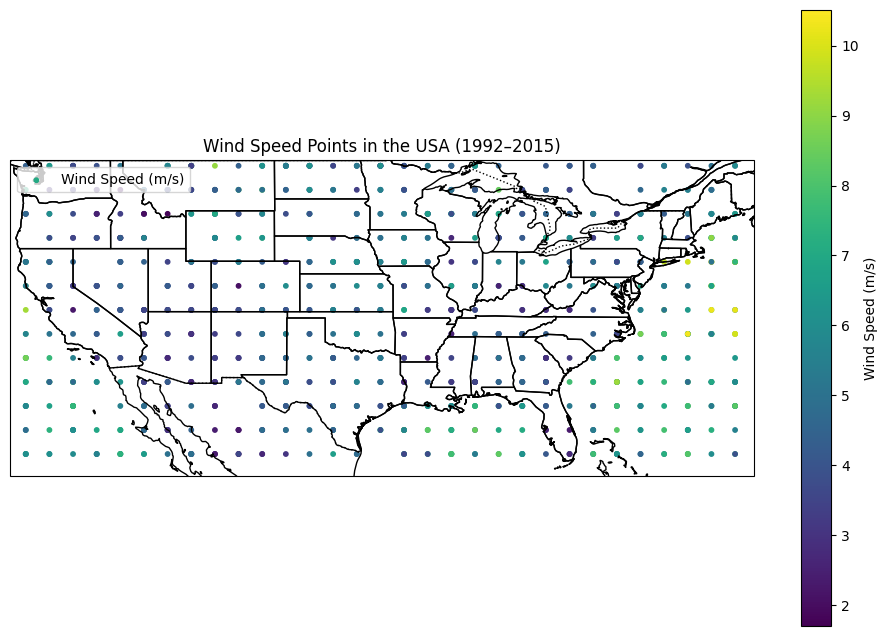

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# File path to the CSV
csv_file = r".\Data_Waldbrand_Zeitreihen\Wind\wind_speed_1992_2015.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(csv_file)

# Convert longitudes from 0°–360° to -180°–180° format
df["lon"] = df["lon"].apply(lambda x: x - 360 if x > 180 else x)

# Filter for a smaller subset to visualize (optional: comment this line to plot all points)
df_subset = df.sample(n=1000)  # Sample 1000 points for better visualization

# Create the map
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -66, 24, 49], crs=ccrs.PlateCarree())  # USA map extent

# Add map features
ax.add_feature(cfeature.STATES, edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.coastlines()

# Plot the points on the map
plt.scatter(df_subset["lon"], df_subset["lat"], c=df_subset["wspd"], cmap="viridis", s=10, transform=ccrs.PlateCarree(), label="Wind Speed (m/s)")

# Add a colorbar
plt.colorbar(label="Wind Speed (m/s)")

# Title and labels
plt.title("Wind Speed Points in the USA (1992–2015)")
plt.legend(loc="upper left")

# Show the map
plt.show()


### Skript zur Schätzung der Windgeschwindigkeit

Dieses Skript schätzt die **Windgeschwindigkeit** für Brandereignisse, indem es Feuerstandorte und -daten mit dem nächstgelegenen Rasterpunkt des Winddatensatzes in Raum und Zeit abgleicht.

#### **Schritte:**
1. **Datenvorbereitung**:
   - Passen Sie die Längengrade der Feuerdaten an das 0–360-Grad-Format des Winddatensatzes an.
   - Laden Sie den Winddatensatz (`wspd.10m.mon.mean.nc`) mit monatlichen Durchschnittswindgeschwindigkeiten.

2. **Inferenzprozess**:
   - Für jedes Brandereignis wird der **nächstgelegene Rasterpunkt** im Winddatensatz gesucht anhand von:
     - **Breiten- und Längengrad**: Räumliche Nähe.
     - **Datum**: Zeitliche Übereinstimmung mit dem Entdeckungsdatum des Feuers.

3. **Stapelverarbeitung**:
   - Aufteilung der Feuerdaten in handhabbare Teile (`bulk_size`) für eine effiziente Verarbeitung.
   - Speichern der Ergebnisse für jeden Stapel als separate CSV-Dateien.

4. **Ergebnisse zusammenführen**:
   - Alle Teildateien zu einer einzigen Ausgabedatei zusammenführen: `fire_wind_speed_inferred.csv`.

#### **Outputs**:
- **Stapeldateien**: CSV-Dateien für Zwischenergebnisse.
- **Endgültige CSV-Datei**: Enthält die abgeleiteten Windgeschwindigkeiten für alle Brandereignisse, abgeglichen nach Standort und Datum.


In [20]:
import pandas as pd
import xarray as xr
import os

# File paths
fire_data_path = "./Data_Waldbrand_Zeitreihen/fires_data.csv"
wind_data_path = "./Data_Waldbrand_Zeitreihen/Wind/wspd.10m.mon.mean.nc"
output_bulk_dir = "./Data_Waldbrand_Zeitreihen/Wind/bulks"
merged_output_csv = "./Data_Waldbrand_Zeitreihen/Wind/fire_wind_speed_inferred.csv"

# Ensure the bulk directory exists
os.makedirs(output_bulk_dir, exist_ok=True)

# Load the fire dataset
fires_df = pd.read_csv(fire_data_path)

# Adjust fire data longitude to match the wind data's format (0–360 degrees)
fires_df['LONGITUDE'] = fires_df['LONGITUDE'].apply(lambda x: x + 360 if x < 0 else x)

# Load the wind dataset
wind_ds = xr.open_dataset(wind_data_path)

# Define bulk size
bulk_size = 1000  # Adjust this as needed for performance and memory
total_rows = len(fires_df)
num_bulks = (total_rows + bulk_size - 1) // bulk_size  # Calculate number of bulks
print(f"Total rows: {total_rows}, Bulk size: {bulk_size}, Number of bulks: {num_bulks}")

# Process data in bulks
for i in range(num_bulks):
    start_idx = i * bulk_size
    end_idx = min((i + 1) * bulk_size, total_rows)
    bulk_df = fires_df.iloc[start_idx:end_idx]
    
    inferred_data = []
    
    # Process each fire record in the bulk
    for _, fire in bulk_df.iterrows():
        fire_lat = fire['LATITUDE']
        fire_lon = fire['LONGITUDE']
        fire_date = pd.to_datetime(fire['DISCOVERY_DATE']).strftime('%Y-%m-%d')
        
        # Select the nearest wind data point in space and time
        wind_point = wind_ds['wspd'].sel(
            lat=fire_lat, 
            lon=fire_lon, 
            time=fire_date, 
            method="nearest"
        )
        
        # Add the result to the list
        inferred_data.append({
            "Date": fire_date,
            "Latitude": fire_lat,
            "Longitude": fire_lon,
            "Inferred_Wind_Speed": wind_point.values if not pd.isnull(wind_point.values) else None
        })
    
    # Save the bulk results to a CSV file
    bulk_output_path = os.path.join(output_bulk_dir, f"bulk_{i + 1}.csv")
    pd.DataFrame(inferred_data).to_csv(bulk_output_path, index=False)
    print(f"Processed bulk {i + 1}/{num_bulks}, saved to {bulk_output_path}")

# Merge all bulk files into a single CSV
merged_df = pd.concat(
    [pd.read_csv(os.path.join(output_bulk_dir, f)) for f in os.listdir(output_bulk_dir) if f.endswith(".csv")]
)
merged_df.to_csv(merged_output_csv, index=False)

print(f"All bulks merged and saved to: {merged_output_csv}")


C:\Users\fsali\AppData\Local\Temp\ipykernel_17636\3773064886.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fires_df = pd.read_csv(fire_data_path)


Total rows: 1880465, Bulk size: 1000, Number of bulks: 1881
Processed bulk 1/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_1.csv
Processed bulk 2/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_2.csv
Processed bulk 3/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_3.csv
Processed bulk 4/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_4.csv
Processed bulk 5/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_5.csv
Processed bulk 6/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_6.csv
Processed bulk 7/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_7.csv
Processed bulk 8/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_8.csv
Processed bulk 9/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_9.csv
Processed bulk 10/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_10.csv
Processed bulk 11/1881, saved to ./Data_Waldbrand_Zeitreihen/Wind/bulks\bulk_11.csv
Processed bulk 12/1881, saved to .

In [3]:
import pandas as pd

# Path to the fire wind speed inferred CSV
wind_speed_csv_path = "./Data_Waldbrand_Zeitreihen/Wind/fire_wind_speed_inferred.csv"

# Load the data into a DataFrame
daily_data = pd.read_csv(wind_speed_csv_path)

# Remove brackets and convert to float
daily_data['Inferred_Wind_Speed'] = daily_data['Inferred_Wind_Speed'].astype(str).str.replace('\\[', '', regex=True).str.replace('\\]', '', regex=True).astype(float)

# Verify the changes
print(daily_data['Inferred_Wind_Speed'].head())



# Remove brackets and convert to float
daily_data['Inferred_Wind_Speed'] = daily_data['Inferred_Wind_Speed'].astype(str).str.replace('\\[', '', regex=True).str.replace('\\]', '', regex=True).astype(float)

# Save the updated DataFrame back to the CSV file
daily_data.to_csv(wind_speed_csv_path, index=False)

# Verify the changes
print(daily_data.head())

0    4.720001
1    3.779999
2    4.069992
3    3.440002
4    3.440002
Name: Inferred_Wind_Speed, dtype: float64
         Date   Latitude   Longitude  Inferred_Wind_Speed
0  2005-02-02  40.036944  238.994167             4.720001
1  2004-05-12  38.933056  239.595556             3.779999
2  2004-05-31  38.984167  239.264444             4.069992
3  2004-06-28  38.559167  240.086667             3.440002
4  2004-06-28  38.559167  240.066944             3.440002


# Präzipitation

In [17]:
import xarray as xr

# File path to the NetCDF file
file_path = ".\Data_Waldbrand_Zeitreihen\Prazipitation\precip.1992.nc"

try:
    # Open the NetCDF file
    dataset = xr.open_dataset(file_path)

    # Display the dataset structure
    print("Dataset Structure:")
    print(dataset)

    # Display the variables in the dataset
    print("\nVariables in the Dataset:")
    print(dataset.variables)

    # Display the attributes of the dataset
    print("\nDataset Attributes:")
    print(dataset.attrs)

    # Preview a specific variable (replace 'variable_name' with an actual variable if known)
    print("\nExample Variable Data:")
    print(dataset.data_vars)
except FileNotFoundError:
    print(f"File not found at: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset Structure:
<xarray.Dataset> Size: 379MB
Dimensions:  (lat: 360, lon: 720, time: 366)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 1992-01-01 1992-01-02 ... 1992-12-31
Data variables:
    precip   (time, lat, lon) float32 379MB ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL PRCP V1.0
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...

Variables in the Dataset:
Frozen({'lat': <xarray.IndexVariable 'lat' (lat: 360)> Size: 1kB
array([ 89.75,  89.25,  88.75, ..., -88.75, -89.25, -89.75], dtype=float32)
Attributes:
    actual_range:        [ 89.75 -89.75]
    long_name:        

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\fsali\AppData\Local\Temp\ipykernel_6476\2471490541.py:4: SyntaxWarning: invalid escape sequence '\D'
  file_path = ".\Data_Waldbrand_Zeitreihen\Prazipitation\precip.1992.nc"


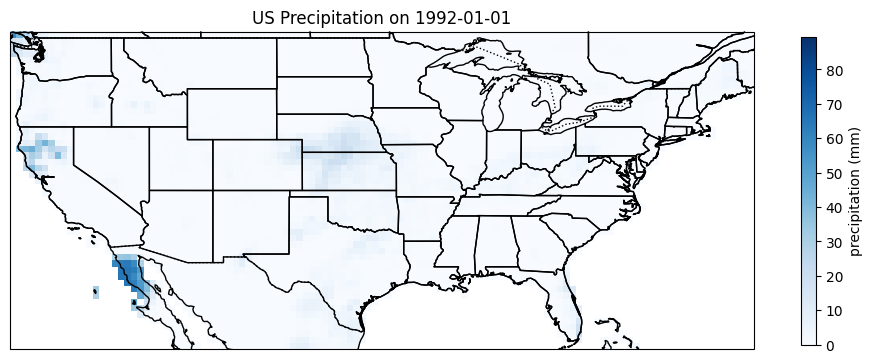

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the data
data_path = "./Data_Waldbrand_Zeitreihen/Prazipitation/precip.1992.nc"
ds = xr.open_dataset(data_path)

# Specify the longitude and latitude bounds [min_lon, max_lon, min_lat, max_lat]
bounds = [-125, -66.5, 24.5, 49.5]  # Rough bounds for the continental US

# Filter the dataset for a single day (for demonstration)
precip_data = ds['precip'].sel(time='1992-01-01')

# Create a figure with Cartopy
fig, ax = plt.subplots(
    figsize=(12, 8),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Set extent to focus on the United States
ax.set_extent(bounds, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-')
ax.add_feature(cfeature.COASTLINE)

# Plot the data
precipitation = precip_data.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Blues',
    add_colorbar=True,
    cbar_kwargs={'shrink': 0.5, 'label': 'precipitation (mm)'}
)

# Add a title
plt.title('US Precipitation on 1992-01-01')

plt.show()


In [ ]:
import xarray as xr
import pandas as pd
import os
import time

# Base directory for data
base_dir = "Data_Waldbrand_Zeitreihen"

# Path to the fire data CSV
fire_data_path = os.path.join(base_dir, "fires_data.csv")

# Load fires data
fires_df = pd.read_csv(fire_data_path)
fires_df['DISCOVERY_DATE'] = pd.to_datetime(fires_df['DISCOVERY_DATE'], errors='coerce')
if fires_df['DISCOVERY_DATE'].isnull().any():
    print("Errors in date conversion detected, adjusting...")
    fires_df['DISCOVERY_DATE'] = pd.to_datetime(fires_df['DISCOVERY_DATE'], unit='D', origin='julian')

# Convert longitude from -180 to 180 to 0 to 360 (if necessary)
fires_df['LONGITUDE'] = fires_df['LONGITUDE'].apply(lambda x: x + 360 if x < 0 else x)

# Define bulk size and prepare directory for bulk CSVs
bulk_size = 10000  # Number of fire records to process in each bulk
total_fires = len(fires_df)
num_bulks = (total_fires + bulk_size - 1) // bulk_size
bulk_dir = os.path.join(base_dir, "Prazipitation", "Bulk_CSVs")
os.makedirs(bulk_dir, exist_ok=True)

start_time = time.time()

# Process each year's fire data in bulks
for year in range(1992, 2016):
    nc_file = os.path.join(base_dir, "Prazipitation", f"precip.{year}.nc")
    if os.path.exists(nc_file):
        ds = xr.open_dataset(nc_file)
        
        # Process fires in bulks for the current year
        year_fires = fires_df[fires_df['FIRE_YEAR'] == year]
        for i in range(num_bulks):
            bulk_start = i * bulk_size
            bulk_end = min((i + 1) * bulk_size, total_fires)
            bulk_fires = year_fires.iloc[bulk_start:bulk_end]

            bulk_csv_path = os.path.join(bulk_dir, f"bulk_{year}_{i + 1}.csv")

            # Check if bulk file already exists and is not empty before processing
            if os.path.exists(bulk_csv_path) and os.path.getsize(bulk_csv_path) > 0:
                print(f"Skipping {bulk_csv_path}, already processed and not empty.")
                continue

            bulk_results = []
            for _, fire in bulk_fires.iterrows():
                fire_date = fire['DISCOVERY_DATE']
                
                # Find closest data point in the NetCDF file # the fire date is compared to respective .nc file and select neares Precipitation value
                closest_data = ds.sel(time=fire_date, method='nearest')
                precip_data = closest_data['precip'].sel(
                    lon=fire['LONGITUDE'],
                    lat=fire['LATITUDE'],
                    method='nearest'
                ).item()
                
                # Store results for the current bulk
                bulk_results.append({
                    "Date": fire_date,
                    "Latitude": fire['LATITUDE'],
                    "Longitude": fire['LONGITUDE'],
                    "Precipitation": precip_data
                })
            
            # Convert bulk results to DataFrame and save to CSV
            new_rows = pd.DataFrame(bulk_results)
            new_rows.to_csv(bulk_csv_path, index=False)
            print(f"Processed bulk {i + 1}/{num_bulks} for year {year}, saved to {bulk_csv_path}")

            # Delete empty CSV files
            if new_rows.empty:
                os.remove(bulk_csv_path)
                print(f"Deleted empty file {bulk_csv_path}")
        
        # Close the dataset after processing
        ds.close()
    else:
        print(f"No data file for year {year}")

# Combine all bulk CSVs into a single CSV file
output_csv_path = os.path.join(base_dir, "Prazipitation", "final_output_precipitation_data.csv")
all_files = [os.path.join(bulk_dir, f) for f in os.listdir(bulk_dir) if f.endswith('.csv')]
all_data = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)
all_data.to_csv(output_csv_path, index=False)
print(f"All data successfully merged and written to {output_csv_path}")


# Calculate and print the total processing time
end_time = time.time()
print(f"Total processing time: {end_time - start_time} seconds")


C:\Users\fsali\AppData\Local\Temp\ipykernel_6476\3242898064.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fires_df = pd.read_csv(fire_data_path)


Skipping Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_1.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_2.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_3.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_4.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_5.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_6.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_7.csv, already processed and not empty.
Processed bulk 8/189 for year 1992, saved to Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_8.csv
Deleted empty file Data_Waldbrand_Zeitreihen\Prazipitation\Bulk_CSVs\bulk_1992_8.csv
Processed bulk 9/189 for year 1992, saved

# Max Temperatur

In [56]:
import xarray as xr
import pandas as pd
import os
import time

# Base directory for data
base_dir = "Data_Waldbrand_Zeitreihen"

# Path to the fire data CSV
fire_data_path = os.path.join(base_dir, "fires_data.csv")

# Load fire data
fires_df = pd.read_csv(fire_data_path)
fires_df['DISCOVERY_DATE'] = pd.to_datetime(fires_df['DISCOVERY_DATE'], errors='coerce')
if fires_df['DISCOVERY_DATE'].isnull().any():
    print("Errors in date conversion detected, adjusting...")
    fires_df['DISCOVERY_DATE'] = pd.to_datetime(fires_df['DISCOVERY_DATE'], unit='D', origin='julian')

# Convert longitude from -180 to 180 to 0 to 360 (if necessary)
fires_df['LONGITUDE'] = fires_df['LONGITUDE'].apply(lambda x: x + 360 if x < 0 else x)

# Define bulk size and prepare directory for bulk CSVs
bulk_size = 10000  # Number of fire records to process in each bulk
total_fires = len(fires_df)
num_bulks = (total_fires + bulk_size - 1) // bulk_size
bulk_dir = os.path.join(base_dir, "Temp", "tmax", "Bulk_CSVs")
os.makedirs(bulk_dir, exist_ok=True)

start_time = time.time()

# Process each year's Tmax data in bulks
for year in range(1992, 2016):
    nc_file = os.path.join(base_dir, "Temp", "tmax", f"tmax.{year}.nc")
    if os.path.exists(nc_file):
        ds = xr.open_dataset(nc_file)
        
        # Process fires in bulks for the current year
        year_fires = fires_df[fires_df['FIRE_YEAR'] == year]
        for i in range(num_bulks):
            bulk_start = i * bulk_size
            bulk_end = min((i + 1) * bulk_size, total_fires)
            bulk_fires = year_fires.iloc[bulk_start:bulk_end]

            bulk_csv_path = os.path.join(bulk_dir, f"bulk_{year}_{i + 1}.csv")

            # Check if bulk file already exists and is not empty before processing
            if os.path.exists(bulk_csv_path) and os.path.getsize(bulk_csv_path) > 0:
                print(f"Skipping {bulk_csv_path}, already processed and not empty.")
                continue

            bulk_results = []
            for _, fire in bulk_fires.iterrows():
                fire_date = fire['DISCOVERY_DATE']
                
                # Find closest data point in the NetCDF file
                closest_data = ds.sel(time=fire_date, method='nearest')
                temp_max = closest_data['tmax'].sel(
                    lon=fire['LONGITUDE'],
                    lat=fire['LATITUDE'],
                    method='nearest'
                ).item()
                
                # Store results for the current bulk
                bulk_results.append({
                    "Date": fire_date,
                    "Latitude": fire['LATITUDE'],
                    "Longitude": fire['LONGITUDE'],
                    "MaxTemperature": temp_max
                })
            
            # Convert bulk results to DataFrame and save to CSV
            new_rows = pd.DataFrame(bulk_results)
            new_rows.to_csv(bulk_csv_path, index=False)
            print(f"Processed bulk {i + 1}/{num_bulks} for year {year}, saved to {bulk_csv_path}")

            # Delete empty CSV files
            if new_rows.empty:
                os.remove(bulk_csv_path)
                print(f"Deleted empty file {bulk_csv_path}")
        
        # Close the dataset after processing
        ds.close()
    else:
        print(f"No Tmax file found for year {year}")

# Optionally, combine all bulk CSVs into a single CSV file
output_csv_path = os.path.join(base_dir, "Temp", "final_output_Max_temperature_data.csv")
all_files = [os.path.join(bulk_dir, f) for f in os.listdir(bulk_dir) if f.endswith('.csv')]
all_data = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)
all_data.to_csv(output_csv_path, index=False)
print(f"All data successfully merged and written to {output_csv_path}")

# Calculate and print the total processing time
end_time = time.time()
print(f"Total processing time: {end_time - start_time} seconds")


C:\Users\fsali\AppData\Local\Temp\ipykernel_6476\702059054.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fires_df = pd.read_csv(fire_data_path)


Skipping Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_1.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_2.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_3.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_4.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_5.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_6.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_7.csv, already processed and not empty.
Processed bulk 8/189 for year 1992, saved to Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_8.csv
Deleted empty file Data_Waldbrand_Zeitreihen\Temp\tmax\Bulk_CSVs\bulk_1992_8.csv
Processed bulk 9/189 for year 1992, saved to Data_Waldbrand_Zeitreihen\Temp\t

# Min Temperatur

In [60]:
import xarray as xr
import pandas as pd
import os
import time

# Base directory for data
base_dir = "Data_Waldbrand_Zeitreihen"

# Path to the fire data CSV
fire_data_path = os.path.join(base_dir, "fires_data.csv")

# Load fire data
fires_df = pd.read_csv(fire_data_path)
fires_df['DISCOVERY_DATE'] = pd.to_datetime(fires_df['DISCOVERY_DATE'], errors='coerce')
if fires_df['DISCOVERY_DATE'].isnull().any():
    print("Errors in date conversion detected, adjusting...")
    fires_df['DISCOVERY_DATE'] = pd.to_datetime(fires_df['DISCOVERY_DATE'], unit='D', origin='julian')

# Convert longitude from -180 to 180 to 0 to 360 (if necessary)
fires_df['LONGITUDE'] = fires_df['LONGITUDE'].apply(lambda x: x + 360 if x < 0 else x)

# Define bulk size and prepare directory for bulk CSVs
bulk_size = 10000  # Number of fire records to process in each bulk
total_fires = len(fires_df)
num_bulks = (total_fires + bulk_size - 1) // bulk_size
bulk_dir = os.path.join(base_dir, "Temp", "tmin", "Bulk_CSVs")
os.makedirs(bulk_dir, exist_ok=True)

start_time = time.time()

# Process each year's Tmin data in bulks
for year in range(1992, 2016):
    nc_file = os.path.join(base_dir, "Temp", "tmin", f"tmin.{year}.nc")
    if os.path.exists(nc_file):
        try:
            ds = xr.open_dataset(nc_file)
        except Exception as e:
            print(f"Failed to open {nc_file}: {e}")
            continue
        
        # Process fires in bulks for the current year
        year_fires = fires_df[fires_df['FIRE_YEAR'] == year]
        for i in range(num_bulks):
            bulk_start = i * bulk_size
            bulk_end = min((i + 1) * bulk_size, total_fires)
            bulk_fires = year_fires.iloc[bulk_start:bulk_end]

            bulk_csv_path = os.path.join(bulk_dir, f"bulk_{year}_{i + 1}.csv")

            # Check if bulk file already exists and is not empty before processing
            if os.path.exists(bulk_csv_path) and os.path.getsize(bulk_csv_path) > 0:
                print(f"Skipping {bulk_csv_path}, already processed and not empty.")
                continue

            bulk_results = []
            for _, fire in bulk_fires.iterrows():
                fire_date = fire['DISCOVERY_DATE']
                
                # Find closest data point in the NetCDF file
                closest_data = ds.sel(time=fire_date, method='nearest')
                temp_min = closest_data['tmin'].sel(
                    lon=fire['LONGITUDE'],
                    lat=fire['LATITUDE'],
                    method='nearest'
                ).item()
                
                # Store results for the current bulk
                bulk_results.append({
                    "Date": fire_date,
                    "Latitude": fire['LATITUDE'],
                    "Longitude": fire['LONGITUDE'],
                    "MinTemperature": temp_min
                })
            
            # Convert bulk results to DataFrame and save to CSV
            new_rows = pd.DataFrame(bulk_results)
            new_rows.to_csv(bulk_csv_path, index=False)
            print(f"Processed bulk {i + 1}/{num_bulks} for year {year}, saved to {bulk_csv_path}")

            # Delete empty CSV files
            if new_rows.empty:
                os.remove(bulk_csv_path)
                print(f"Deleted empty file {bulk_csv_path}")
        
        # Close the dataset after processing
        ds.close()
    else:
        print(f"No Tmin file found for year {year}")


# Optionally, combine all bulk CSVs into a single CSV file
output_csv_path = os.path.join(base_dir, "Temp", "final_output_Min_temperature_data.csv")
all_files = [os.path.join(bulk_dir, f) for f in os.listdir(bulk_dir) if f.endswith('.csv')]
all_data = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)
all_data.to_csv(output_csv_path, index=False)
print(f"All data successfully merged and written to {output_csv_path}")



C:\Users\fsali\AppData\Local\Temp\ipykernel_6476\1626996468.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fires_df = pd.read_csv(fire_data_path)


Skipping Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_1.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_2.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_3.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_4.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_5.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_6.csv, already processed and not empty.
Skipping Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_7.csv, already processed and not empty.
Processed bulk 8/189 for year 1992, saved to Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_8.csv
Deleted empty file Data_Waldbrand_Zeitreihen\Temp\tmin\Bulk_CSVs\bulk_1992_8.csv
Processed bulk 9/189 for year 1992, saved to Data_Waldbrand_Zeitreihen\Temp\t

# Brände Daten mit Variablen zusammenführen


## Tägliche Daten


In [4]:
import pandas as pd
import os
import time

# Define base directory and paths
base_dir = "Data_Waldbrand_Zeitreihen"
bulk_dir = os.path.join(base_dir, "daily_data_merged", "Bulk_CSVs")
os.makedirs(bulk_dir, exist_ok=True)  # Ensure the bulk directory exists

data_paths = {
    "precipitation": os.path.join(base_dir, "Prazipitation", "final_output_precipitation_data.csv"),
    "wind": os.path.join(base_dir, "Wind", "fire_wind_speed_inferred.csv"),
    "max_temp": os.path.join(base_dir, "Temp", "final_output_Max_temperature_data.csv"),
    "min_temp": os.path.join(base_dir, "Temp", "final_output_Min_temperature_data.csv")
}

fire_data_path = os.path.join(base_dir, "fires_data.csv")

# Load supplementary datasets
def load_and_prepare_dataset(path, name):
    dataset = pd.read_csv(path).drop_duplicates()
    dataset.rename(columns={
        'Date': 'DISCOVERY_DATE',
        'Latitude': 'LATITUDE',
        'Longitude': 'LONGITUDE'
    }, inplace=True)
    dataset['DISCOVERY_DATE'] = pd.to_datetime(dataset['DISCOVERY_DATE']).dt.strftime('%Y-%m-%d')
    dataset['LATITUDE'] = dataset['LATITUDE'].round(4)
    dataset['LONGITUDE'] = dataset['LONGITUDE'].round(4)
    print(f"Loaded and prepared {name} dataset with {len(dataset)} rows.")
    return dataset

datasets = {name: load_and_prepare_dataset(path, name) for name, path in data_paths.items()}

# Define the bulk processing function
def process_and_merge_chunk(fire_data_chunk, chunk_id):
    # Adjust longitude for consistency (fire_data uses [-180, 180], others use [0, 360])
    fire_data_chunk['LONGITUDE'] = fire_data_chunk['LONGITUDE'].apply(lambda x: x + 360 if x < 0 else x)
    fire_data_chunk['LATITUDE'] = fire_data_chunk['LATITUDE'].round(4)
    fire_data_chunk['LONGITUDE'] = fire_data_chunk['LONGITUDE'].round(4)

    # Perform left joins with each dataset
    combined_chunk = fire_data_chunk
    for name, dataset in datasets.items():
        combined_chunk = combined_chunk.merge(dataset, on=['DISCOVERY_DATE', 'LATITUDE', 'LONGITUDE'], how='left', indicator=True)
        unmatched = combined_chunk[combined_chunk['_merge'] != 'both']
        print(f"Chunk {chunk_id}: Left joined with {name} dataset. Current shape: {combined_chunk.shape}")
        print(f"Unmatched rows after joining with {name}: {len(unmatched)}")
        combined_chunk.drop(columns=['_merge'], inplace=True)  # Clean up '_merge' column after debugging

    # Save the chunk to a CSV file
    bulk_path = os.path.join(bulk_dir, f'bulk_{chunk_id}.csv')
    combined_chunk.to_csv(bulk_path, index=False)
    return bulk_path

# Process fire data in chunks
chunk_size = 100000  # Define chunk size
reader = pd.read_csv(fire_data_path, chunksize=chunk_size)
bulk_files = []

chunk_id = 1
start_time = time.time()
for fire_data_chunk in reader:
    fire_data_chunk['DISCOVERY_DATE'] = pd.to_datetime(fire_data_chunk['DISCOVERY_DATE']).dt.strftime('%Y-%m-%d')
    fire_data_chunk['LATITUDE'] = fire_data_chunk['LATITUDE'].round(4)
    fire_data_chunk['LONGITUDE'] = fire_data_chunk['LONGITUDE'].apply(lambda x: x + 360 if x < 0 else x).round(4)
    bulk_path = process_and_merge_chunk(fire_data_chunk, chunk_id)
    bulk_files.append(bulk_path)
    elapsed_time = time.time() - start_time
    remaining_chunks = len(bulk_files) - chunk_id
    print(f"Processed chunk {chunk_id}. Estimated time remaining: {remaining_chunks * elapsed_time / max(1, chunk_id):.2f} seconds")
    chunk_id += 1

# Concatenate all processed chunks into a final CSV file
final_output_path = os.path.join(base_dir, "daily_data_merged", "final_combined_environment_fire_data.csv")
with open(final_output_path, 'w') as final_file:
    for i, bulk_file in enumerate(bulk_files):
        with open(bulk_file, 'r') as infile:
            if i == 0:
                # Write header for the first file
                final_file.write(infile.read())
            else:
                # Skip header for subsequent files
                next(infile)
                final_file.write(infile.read())

print(f"Combined data saved to: {final_output_path}")

# Debugging for missing rows
final_combined = pd.read_csv(final_output_path)
fire_data = pd.read_csv(fire_data_path)
fire_data['LONGITUDE'] = fire_data['LONGITUDE'].apply(lambda x: x + 360 if x < 0 else x).round(4)
fire_data['LATITUDE'] = fire_data['LATITUDE'].round(4)

# Check total rows
print(f"Total rows in fire_data.csv: {len(fire_data)}")
print(f"Total rows in final_combined_environment_fire_data.csv: {len(final_combined)}")

# Find rows in fire_data that are missing from the final combined data
missing_rows = fire_data.merge(final_combined, on=['DISCOVERY_DATE', 'LATITUDE', 'LONGITUDE'], how='left', indicator=True)
missing_rows = missing_rows[missing_rows['_merge'] == 'left_only']

print(f"Rows missing from final_combined_environment_fire_data.csv: {len(missing_rows)}")

# Save missing rows for further analysis
missing_rows_path = os.path.join(base_dir, "daily_data_merged", "missing_fire_rows.csv")
missing_rows.drop(columns=['_merge'], inplace=True)
missing_rows.to_csv(missing_rows_path, index=False)

print(f"Missing rows saved to: {missing_rows_path}")


Loaded and prepared precipitation dataset with 1850315 rows.
Loaded and prepared wind dataset with 1850315 rows.
Loaded and prepared max_temp dataset with 1850315 rows.
Loaded and prepared min_temp dataset with 1850315 rows.
Chunk 1: Left joined with precipitation dataset. Current shape: (100008, 12)
Unmatched rows after joining with precipitation: 0
Chunk 1: Left joined with wind dataset. Current shape: (100024, 13)
Unmatched rows after joining with wind: 0
Chunk 1: Left joined with max_temp dataset. Current shape: (100056, 14)
Unmatched rows after joining with max_temp: 0
Chunk 1: Left joined with min_temp dataset. Current shape: (100120, 15)
Unmatched rows after joining with min_temp: 0
Processed chunk 1. Estimated time remaining: 0.00 seconds
Chunk 2: Left joined with precipitation dataset. Current shape: (100000, 12)
Unmatched rows after joining with precipitation: 0
Chunk 2: Left joined with wind dataset. Current shape: (100000, 13)
Unmatched rows after joining with wind: 0
Chunk

C:\Users\fsali\AppData\Local\Temp\ipykernel_21972\4034068875.py:63: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  for fire_data_chunk in reader:


Chunk 7: Left joined with precipitation dataset. Current shape: (100030, 12)
Unmatched rows after joining with precipitation: 177
Chunk 7: Left joined with wind dataset. Current shape: (100090, 13)
Unmatched rows after joining with wind: 177
Chunk 7: Left joined with max_temp dataset. Current shape: (100210, 14)
Unmatched rows after joining with max_temp: 177
Chunk 7: Left joined with min_temp dataset. Current shape: (100450, 15)
Unmatched rows after joining with min_temp: 177
Processed chunk 7. Estimated time remaining: 0.00 seconds
Chunk 8: Left joined with precipitation dataset. Current shape: (100005, 12)
Unmatched rows after joining with precipitation: 11
Chunk 8: Left joined with wind dataset. Current shape: (100015, 13)
Unmatched rows after joining with wind: 11
Chunk 8: Left joined with max_temp dataset. Current shape: (100035, 14)
Unmatched rows after joining with max_temp: 11
Chunk 8: Left joined with min_temp dataset. Current shape: (100075, 15)
Unmatched rows after joining 

C:\Users\fsali\AppData\Local\Temp\ipykernel_21972\4034068875.py:63: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  for fire_data_chunk in reader:


Chunk 10: Left joined with precipitation dataset. Current shape: (100013, 12)
Unmatched rows after joining with precipitation: 0
Chunk 10: Left joined with wind dataset. Current shape: (100039, 13)
Unmatched rows after joining with wind: 0
Chunk 10: Left joined with max_temp dataset. Current shape: (100091, 14)
Unmatched rows after joining with max_temp: 0
Chunk 10: Left joined with min_temp dataset. Current shape: (100195, 15)
Unmatched rows after joining with min_temp: 0
Processed chunk 10. Estimated time remaining: 0.00 seconds
Chunk 11: Left joined with precipitation dataset. Current shape: (100010, 12)
Unmatched rows after joining with precipitation: 0
Chunk 11: Left joined with wind dataset. Current shape: (100030, 13)
Unmatched rows after joining with wind: 0
Chunk 11: Left joined with max_temp dataset. Current shape: (100070, 14)
Unmatched rows after joining with max_temp: 0
Chunk 11: Left joined with min_temp dataset. Current shape: (100150, 15)
Unmatched rows after joining wi

C:\Users\fsali\AppData\Local\Temp\ipykernel_21972\4034068875.py:90: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  final_combined = pd.read_csv(final_output_path)
C:\Users\fsali\AppData\Local\Temp\ipykernel_21972\4034068875.py:91: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_data = pd.read_csv(fire_data_path)


Total rows in fire_data.csv: 1880465
Total rows in final_combined_environment_fire_data.csv: 1892195
Rows missing from final_combined_environment_fire_data.csv: 0
Missing rows saved to: Data_Waldbrand_Zeitreihen\daily_data_merged\missing_fire_rows.csv


In [5]:
import pandas as pd
import os

# Define base directory and paths
base_dir = "Data_Waldbrand_Zeitreihen"
final_combined_path = os.path.join(base_dir, "daily_data_merged", "final_combined_environment_fire_data.csv")
fire_data_path = os.path.join(base_dir, "fires_data.csv")

# Load the final combined data
final_combined = pd.read_csv(final_combined_path)

# Reload original fire data to compare
fire_data = pd.read_csv(fire_data_path)

# Adjust fire_data coordinates to match final_combined (if needed)
fire_data['LONGITUDE'] = fire_data['LONGITUDE'].apply(lambda x: x + 360 if x < 0 else x).round(4)
fire_data['LATITUDE'] = fire_data['LATITUDE'].round(4)

# Check total rows
print(f"Total rows in fire_data.csv: {len(fire_data)}")
print(f"Total rows in final_combined_environment_fire_data.csv: {len(final_combined)}")

# Find rows in fire_data that are missing from the final combined data
missing_rows = fire_data.merge(final_combined, on=['DISCOVERY_DATE', 'LATITUDE', 'LONGITUDE'], how='left', indicator=True)
missing_rows = missing_rows[missing_rows['_merge'] == 'left_only']

print(f"Rows missing from final_combined_environment_fire_data.csv: {len(missing_rows)}")

# Save missing rows for further analysis
missing_rows_path = os.path.join(base_dir, "daily_data_merged", "missing_fire_rows.csv")
missing_rows.drop(columns=['_merge'], inplace=True)
missing_rows.to_csv(missing_rows_path, index=False)

print(f"Missing rows saved to: {missing_rows_path}")

# Save cleaned final_combined data
final_combined_cleaned = final_combined.drop_duplicates()
cleaned_final_path = os.path.join(base_dir, "daily_data_merged", "final_combined_environment_fire_data_cleaned.csv")
final_combined_cleaned.to_csv(cleaned_final_path, index=False)
print(f"Cleaned final data saved to: {cleaned_final_path}")

# Print total rows in the cleaned final_combined data
print(f"Total rows in cleaned final_combined_environment_fire_data.csv: {len(final_combined_cleaned)}")


C:\Users\fsali\AppData\Local\Temp\ipykernel_21972\1980776989.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  final_combined = pd.read_csv(final_combined_path)
C:\Users\fsali\AppData\Local\Temp\ipykernel_21972\1980776989.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_data = pd.read_csv(fire_data_path)


Total rows in fire_data.csv: 1880465
Total rows in final_combined_environment_fire_data.csv: 1892195
Rows missing from final_combined_environment_fire_data.csv: 0
Missing rows saved to: Data_Waldbrand_Zeitreihen\daily_data_merged\missing_fire_rows.csv
Cleaned final data saved to: Data_Waldbrand_Zeitreihen\daily_data_merged\final_combined_environment_fire_data_cleaned.csv
Total rows in cleaned final_combined_environment_fire_data.csv: 1880465


In [3]:

import pandas as pd
import os

# Define base directory and paths
base_dir = "Data_Waldbrand_Zeitreihen"
cleaned_final_path = os.path.join(base_dir, "daily_data_merged", "final_combined_environment_fire_data_cleaned.csv")

# Load the cleaned final_combined data
final_combined_cleaned = pd.read_csv(cleaned_final_path)

# Ensure DISCOVERY_DATE is in datetime format
final_combined_cleaned['DISCOVERY_DATE'] = pd.to_datetime(final_combined_cleaned['DISCOVERY_DATE'])

# Group by DISCOVERY_DATE and calculate the mean for each day
numeric_columns = final_combined_cleaned.select_dtypes(include=['number']).columns
daily_averages = final_combined_cleaned.groupby('DISCOVERY_DATE')[numeric_columns].mean().reset_index()

# Save the daily averages to a CSV file
daily_averages_path = os.path.join(base_dir, "daily_data_merged", "daily_averages.csv")
daily_averages.to_csv(daily_averages_path, index=False)

print(f"Daily averages saved to: {daily_averages_path}")

C:\Users\fsali\AppData\Local\Temp\ipykernel_9556\2134474755.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  final_combined_cleaned = pd.read_csv(cleaned_final_path)


Daily averages saved to: Data_Waldbrand_Zeitreihen\daily_data_merged\daily_averages.csv


In [4]:
import pandas as pd
import os

# Define the path to the daily fire counts file
daily_fire_counts_path = os.path.join(base_dir, "daily_fire_counts.csv")

# Load the daily fire counts data
daily_fire_counts = pd.read_csv(daily_fire_counts_path)

# Ensure DISCOVERY_DATE is in datetime format
daily_fire_counts['DISCOVERY_DATE'] = pd.to_datetime(daily_fire_counts['DISCOVERY_DATE'])
final_combined_cleaned['DISCOVERY_DATE'] = pd.to_datetime(final_combined_cleaned['DISCOVERY_DATE'])

# Perform the inner join
merged_data = pd.merge(final_combined_cleaned, daily_fire_counts, on='DISCOVERY_DATE', how='inner')

# Save the merged data to a CSV file
merged_output_path = os.path.join(base_dir, "daily_data_merged", "merged_with_daily_fire_counts.csv")
merged_data.to_csv(merged_output_path, index=False)

print(f"Merged data saved to: {merged_output_path}")

Merged data saved to: Data_Waldbrand_Zeitreihen\daily_data_merged\merged_with_daily_fire_counts.csv


## Korrektur nach einzelnen Bränden: merged_with_daily_fire_counts.csv


In [4]:
import pandas as pd

# Load the data
file_path = 'Data_Waldbrand_Zeitreihen/daily_data_merged/merged_with_daily_fire_counts.csv'
data = pd.read_csv(file_path, low_memory=False)

# Convert date columns to datetime
data['DISCOVERY_DATE'] = pd.to_datetime(data['DISCOVERY_DATE'])
data['CONT_DATE'] = pd.to_datetime(data['CONT_DATE'])

# Define a function to determine if rows are close in time and location
def is_proximal(group, max_days_diff=37, max_lat_diff=0.1, max_lon_diff=0.1):
    return (group['DISCOVERY_DATE'].diff().dt.days.abs().fillna(999) <= max_days_diff) & \
           (group['LATITUDE'].diff().abs() <= max_lat_diff) & \
           (group['LONGITUDE'].diff().abs() <= max_lon_diff)

# Group by 'FIRE_YEAR', 'LATITUDE', 'LONGITUDE', apply the proximity function, and then sum/mean as appropriate
grouped = data.sort_values(by=['FIRE_YEAR', 'LATITUDE', 'LONGITUDE'])
grouped['group_id'] = (is_proximal(grouped) == False).cumsum()  # Create a group id for each unique fire

# Aggregate data
aggregated = grouped.groupby('group_id').agg({
    'OBJECTID': 'first',
    'FIRE_YEAR': 'first',
    'DISCOVERY_DATE': 'min',
    'CONT_DATE': 'max',
    'LATITUDE': 'mean',
    'LONGITUDE': 'mean',
    'FIRE_SIZE': 'sum',
    'FIRE_SIZE_CLASS': 'first',  # Assuming the largest size class is not needed
    'STAT_CAUSE_DESCR': 'first',
    'FIRE_NAME': 'first',
    'Precipitation': 'mean',
    'Inferred_Wind_Speed': 'mean',
    'MaxTemperature': 'mean',
    'MinTemperature': 'mean',
    'Daily Fire Counts': 'sum'
})

# Save the aggregated data
aggregated.to_csv('Data_Waldbrand_Zeitreihen/daily_data_merged/merged_with_daily_fire_counts_corrected.csv', index=False)


## Monatliche Durchschnitte


In [61]:
import pandas as pd
import os
import ast
from scipy import signal
# Define base directory and paths
base_dir = "Data_Waldbrand_Zeitreihen"
cleaned_final_path = os.path.join(base_dir, "daily_data_merged", "final_combined_environment_fire_data_cleaned.csv")
monthly_averages_path = os.path.join(base_dir, "monthly_data_merged", "monthly_averages.csv")
monthly_o2_path = os.path.join(base_dir, "Sauerstoff_CO2", "monthly_o2_ljo.csv")
monthly_co2_path = os.path.join(base_dir, "Sauerstoff_CO2", "monthly_co2_ljo.csv")
fire_counts_path = os.path.join(base_dir, "monthly_fire_counts.csv")

# Load the cleaned final_combined data
final_combined_cleaned = pd.read_csv(cleaned_final_path)

# Ensure DISCOVERY_DATE is in datetime format
final_combined_cleaned['DISCOVERY_DATE'] = pd.to_datetime(final_combined_cleaned['DISCOVERY_DATE'])

# Function to extract the numeric value from the list in the wind speed column
def extract_numeric_from_list(value):
    try:
        # Convert string representation of list to actual list and return the first element
        return float(ast.literal_eval(value)[0])
    except (ValueError, SyntaxError, TypeError):
        # Return NaN if conversion fails
        return pd.NA

# Ensure numeric columns are correctly formatted
numeric_columns = ['MinTemperature', 'MaxTemperature', 'Inferred_Wind_Speed', 'Precipitation']
for col in numeric_columns:
    if col == 'Inferred_Wind_Speed':
        # Apply the function to extract the numeric wind speed
        final_combined_cleaned[col] = final_combined_cleaned[col].apply(extract_numeric_from_list)
    else:
        # Convert other columns to numeric
        final_combined_cleaned[col] = pd.to_numeric(final_combined_cleaned[col], errors='coerce')

# Extract year and month from DISCOVERY_DATE
final_combined_cleaned['YearMonth'] = final_combined_cleaned['DISCOVERY_DATE'].dt.to_period('M')

# Calculate monthly averages independent of locality
monthly_averages = final_combined_cleaned.groupby('YearMonth')[numeric_columns].mean().reset_index()

# Save monthly averages to a CSV file
monthly_averages.to_csv(monthly_averages_path, index=False)
print(f"Monthly averages saved to: {monthly_averages_path}")

# Load monthly O2 and CO2 data
def load_monthly_data(file_path):
    return pd.read_csv(
        file_path,
        comment='%',  # Skip comment lines
        header=None,  # No headers in data rows
        skiprows=11,  # Skip metadata lines
        names=[ 
           'Yr', 'Mn', 'Date', 'Date2', 'CO2', 'seasonally', 'fit', 'seasonally2', 'CO2_2', 'seasonally3'
        ],
        na_values=['-99.99', 'NaN']  # Treat these values as NaN
    ).dropna(subset=['Yr', 'Mn'])  # Drop rows where 'Yr' or 'Mn' is NaN

o2_data = load_monthly_data(monthly_o2_path)
co2_data = load_monthly_data(monthly_co2_path)

# Ensure time columns are datetime or period in bimonthly data
o2_data['YearMonth'] = pd.to_datetime(o2_data['Yr'].astype(str) + '-' + o2_data['Mn'].astype(str), errors='coerce').dt.to_period('M')
co2_data['YearMonth'] = pd.to_datetime(co2_data['Yr'].astype(str) + '-' + co2_data['Mn'].astype(str), errors='coerce').dt.to_period('M')

# Rename columns for clarity
o2_data.rename(columns={"CO2_2": "O2_Value", "seasonally3" :"O2_seasonally"}, inplace=True)
co2_data.rename(columns={"CO2_2": "CO2_Value","seasonally3" :"CO2_seasonally"}, inplace=True)



# Merge monthly averages with bimonthly O2 and CO2 data
merged_data = pd.merge(monthly_averages, o2_data[['YearMonth', 'O2_Value', 'O2_seasonally']], on='YearMonth', how='inner', suffixes=('', '_O2'))
merged_data = pd.merge(merged_data, co2_data[['YearMonth', 'CO2_Value', 'CO2_seasonally']], on='YearMonth', how='inner', suffixes=('', '_CO2'))




# Load the fire counts dataset
fire_counts = pd.read_csv(fire_counts_path)

# Convert 'DISCOVERY_DATE' to datetime and then to a period with monthly frequency
fire_counts['YearMonth'] = pd.to_datetime(fire_counts['DISCOVERY_DATE']).dt.to_period('M')


# Convert 'YearMonth' to timestamp for merging
fire_counts['YearMonth'] = fire_counts['YearMonth'].dt.to_timestamp()
merged_data['YearMonth'] = merged_data['YearMonth'].dt.to_timestamp()


# Perform the join
# Convert fire_counts' DISCOVERY_DATE to YearMonth for merging
fire_counts['YearMonth'] = pd.to_datetime(fire_counts['DISCOVERY_DATE']).dt.to_period('M').dt.to_timestamp()
# Perform the merge with fire counts first
merged_with_fire_counts = pd.merge(merged_data, fire_counts, on='YearMonth', how='inner')
print(merged_with_fire_counts.head())

# Detrend the CO2 and O2 values
merged_with_fire_counts['Detrended_CO2'] = signal.detrend(merged_with_fire_counts['CO2_Value'])
merged_with_fire_counts['Detrended_O2'] = signal.detrend(merged_with_fire_counts['O2_Value'])


# Extract month from YearMonth and save it as a new column
merged_with_fire_counts['Month'] = merged_with_fire_counts['YearMonth'].dt.month

# Save the final merged data with fire counts to a CSV file
final_output_path = os.path.join(base_dir, "monthly_data_merged", "merged_monthly_with_o2_co2_fire_counts.csv")
merged_with_fire_counts.to_csv(final_output_path, index=False)

print(f"Final merged data with fire counts saved to: {final_output_path}")


C:\Users\fsali\AppData\Local\Temp\ipykernel_21552\2327176805.py:14: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  final_combined_cleaned = pd.read_csv(cleaned_final_path)


Monthly averages saved to: Data_Waldbrand_Zeitreihen\monthly_data_merged\monthly_averages.csv


C:\Users\fsali\AppData\Local\Temp\ipykernel_21552\2327176805.py:65: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  o2_data['YearMonth'] = pd.to_datetime(o2_data['Yr'].astype(str) + '-' + o2_data['Mn'].astype(str), errors='coerce').dt.to_period('M')
C:\Users\fsali\AppData\Local\Temp\ipykernel_21552\2327176805.py:66: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  co2_data['YearMonth'] = pd.to_datetime(co2_data['Yr'].astype(str) + '-' + co2_data['Mn'].astype(str), errors='coerce').dt.to_period('M')
